In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import mpmath 

In [6]:
data = np.loadtxt('g_*s(T).txt', skiprows=1)
t_imported = data[:, 0]
g_star_s_imported = data[:, 1]
def g_star_s_interp_func(t):
    return sp.interpolate.interp1d(t_imported, g_star_s_imported, fill_value="extrapolate")(t)

In [7]:
TNU_OVER_TGAMMA_infty = (4.0/11.0)**(1.0/3.0)  # ~0.713766

def Tnu_over_Tgamma_approx(T_gamma_MeV, Tdec=0.511, width=0.6):
    x = np.array(T_gamma_MeV, dtype=float)
    s = np.tanh((x - Tdec) / width)  
    r = 0.5*(1.0 + s) * 1.0 + 0.5*(1.0 - s) * TNU_OVER_TGAMMA_infty
    return r

def Tnu_from_Tgamma(T_gamma_MeV, **kwargs):
    return Tnu_over_Tgamma_approx(T_gamma_MeV, **kwargs) * np.array(T_gamma_MeV, dtype=float)

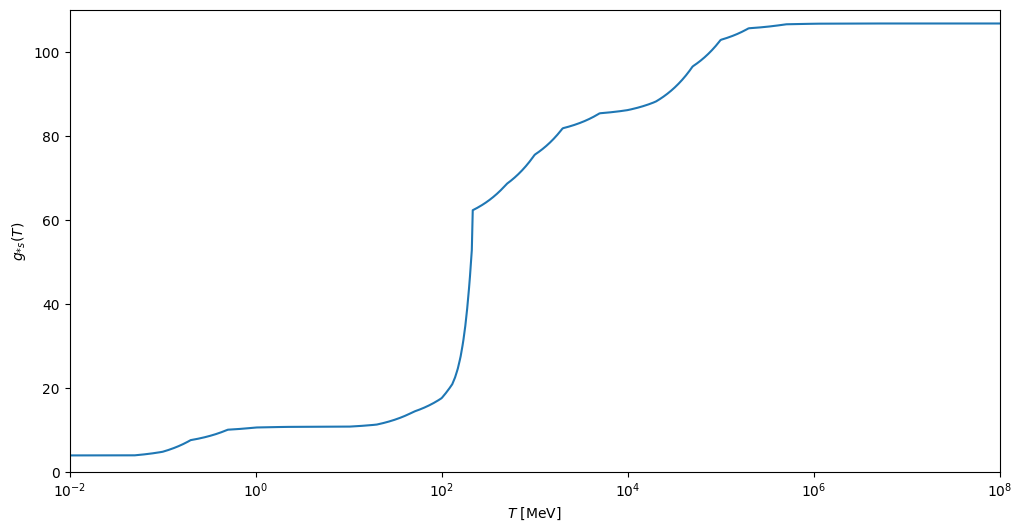

In [8]:
T=np.logspace(-2,8,1000)

plt.figure(figsize=(12, 6))
plt.plot(T, g_star_s_interp_func(T))
plt.xscale('log')
plt.xlabel(r'$T$ [MeV]')
plt.ylabel(r'$g_{*s}(T)$')
plt.ylim(0, 110)
plt.xlim(1e-2, 1e8)
#plt.yscale('log')
plt.show()

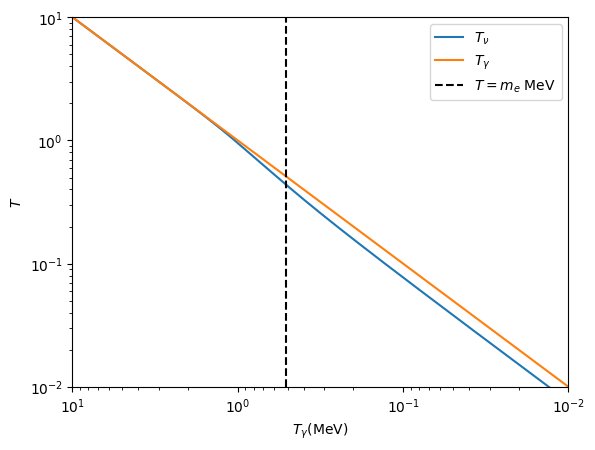

In [9]:
T=np.logspace(-2, 2, 1000)
plt.plot(T, Tnu_from_Tgamma(T), label=fr'$T_\nu$')
plt.plot(T,T,label=fr'$T_\gamma$')
plt.xlabel(fr'$T_\gamma $(MeV)')
plt.ylabel(fr'$T$')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=0.511, color='black', linestyle='--', label=fr'$T = m_e$ MeV')
plt.xlim(1e-2,1e1)
plt.gca().invert_xaxis()
plt.ylim(1e-2, 1e1)
plt.legend()